# Multiple linear regression 
multiple predictors and single target

# Estimate the profit of startups based on RND , ADMIN, MKT and STATE
1. PROFIT ~ RND, ADMIN, MKT, STATE (predictors)
2. PROFIT = B0 + B1xADMIN + B2xMKT + B3xSTATE

In [45]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [46]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Step 2 - basic data quality checks

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

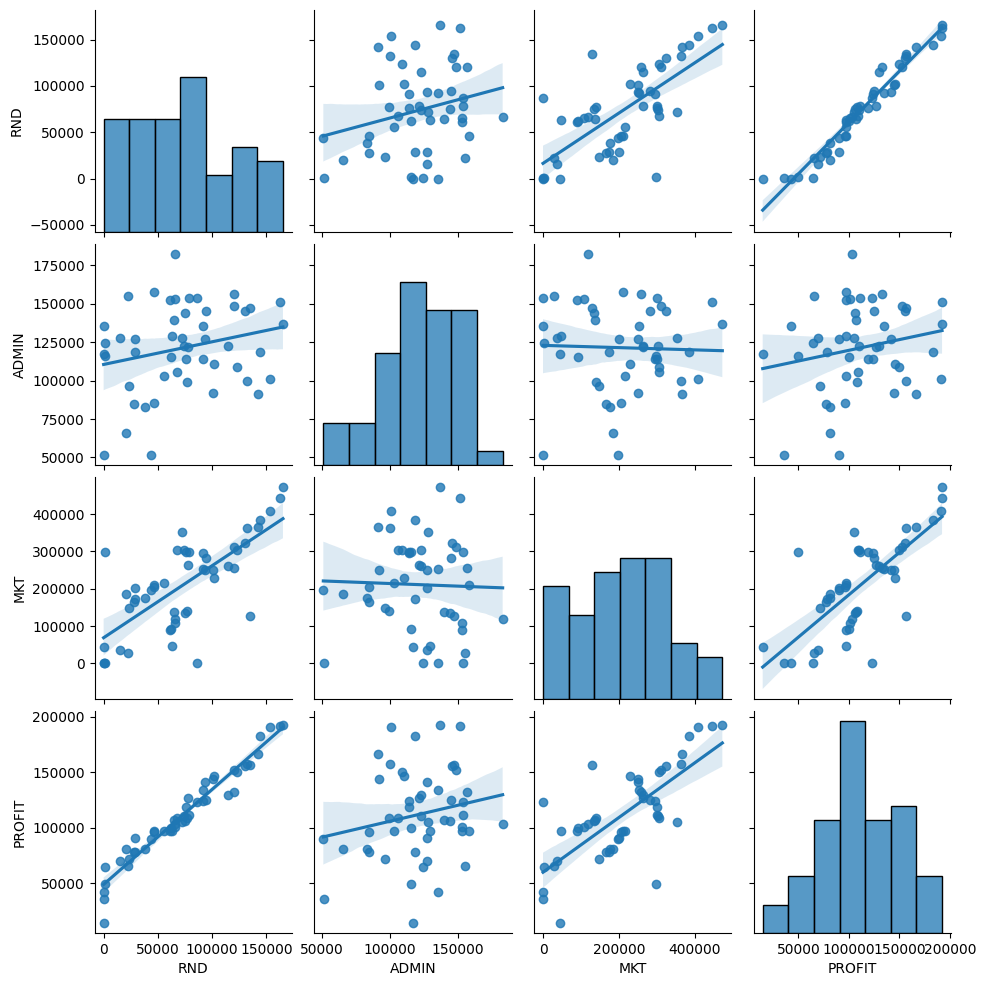

In [50]:
import seaborn as sns
sns.pairplot(data=df,kind="reg")

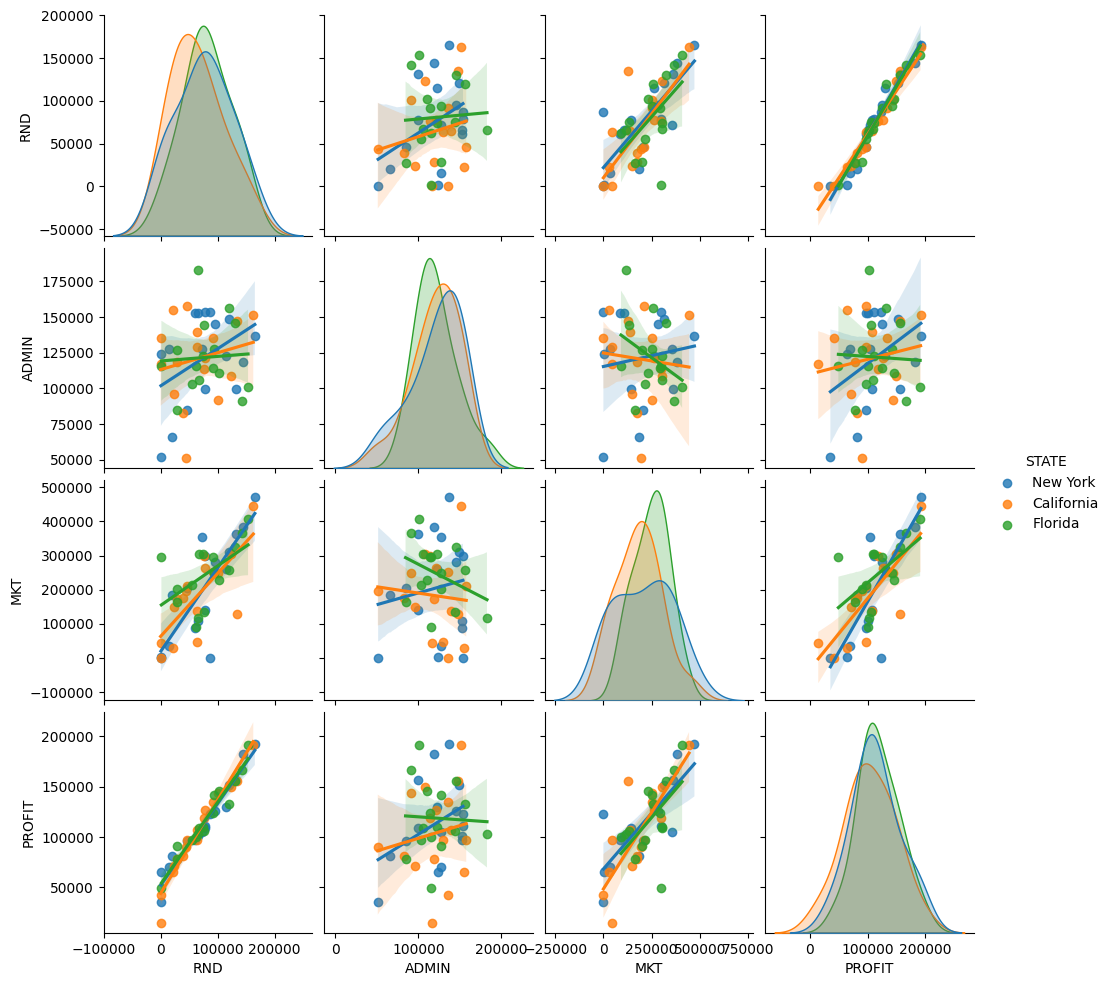

In [51]:
sns.pairplot(data=df, kind="reg", hue="STATE")

In [52]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# Step 3 - Seprate X and Y (profit)

In [67]:
X = df.drop(columns=["PROFIT"])
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [68]:
Y = df["PROFIT"]
Y.head()


0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [55]:
X["STATE"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [69]:
X_state = pd.get_dummies(X["STATE"], dtype=int)
X_state.head()


,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [70]:
X = X.join(X_state)
X.head()

,RND,ADMIN,MKT,STATE,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,0,1
1,162597.70,151377.59,443898.53,California,1,0,0
2,153441.51,101145.55,407934.54,Florida,0,1,0
3,144372.41,118671.85,383199.62,New York,0,0,1
4,142107.34,91391.77,366168.42,Florida,0,1,0


In [71]:
X = X.drop(columns=["STATE"])
X.head()

,RND,ADMIN,MKT,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [72]:
X.dtypes

RND           float64
ADMIN         float64
MKT           float64
California      int64
Florida         int64
New York        int64
dtype: object

# Step 4 - build the model

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
model.intercept_

np.float64(50177.64442285088)

In [75]:
model.coef_

array([ 8.06023114e-01, -2.70043196e-02,  2.69798610e-02, -5.23005912e+01,
        1.46488202e+02, -9.41876104e+01])

In [77]:
X.columns

Index(['RND', 'ADMIN', 'MKT', 'California', 'Florida', 'New York'], dtype='object')

In [78]:
coef = pd.Series(model.coef_, index= X.columns)
coef

RND             0.806023
ADMIN          -0.027004
MKT             0.026980
California    -52.300591
Florida       146.488202
New York      -94.187610
dtype: float64

<Axes: >

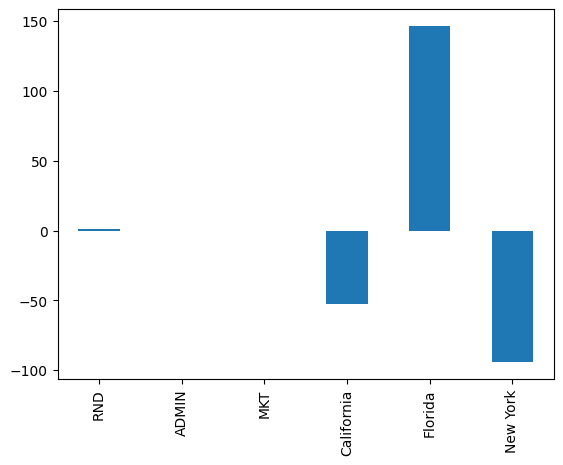

In [83]:
coef.plot(kind="bar")

# Step 5 - Evaluate model

In [84]:
model.score(X,Y)

0.9507524843355148

In [85]:
ypred = model.predict(X)
ypred

array([192390.57136321, 189071.32010494, 182276.18673283, 173584.97618975,
       172277.13381666, 163473.8071184 , 158099.29278417, 160155.64464939,
       151634.74332631, 154829.66252708, 135664.64259063, 135528.60078159,
       129282.91780691, 127431.24898632, 149694.3827755 , 146143.63551378,
       116854.0745287 , 130085.40993359, 129149.72574273, 115594.18840731,
       116570.73444001, 117201.50508975, 114833.30513844, 110123.79610587,
       113294.37345154, 102200.26891867, 110765.3011688 , 114279.80403012,
       101818.58738693, 101721.04202941,  99629.0105373 ,  97617.29632021,
        98988.23660304,  98061.35894838,  88974.70416296,  90420.00960609,
        75423.09286561,  89577.70222194,  69606.52160902,  83684.9760399 ,
        74762.74617648,  74956.31104907,  70575.99371382,  60100.2682187 ,
        64585.14721293,  47588.36470994,  56272.99268497,  46468.23200485,
        49123.07308284,  48185.0387926 ])

In [88]:
ypred[0:5]

array([192390.57136321, 189071.32010494, 182276.18673283, 173584.97618975,
       172277.13381666])

In [89]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [90]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x ,y): 
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y,ypred) 
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    print(f"RMSE : {rmse:2f}")
    print(f"MAE : {mae : 2f}")
    print(f"MAPE : {mape : 2%}")
    print(f"R2 : {r2 : 2%}")
      

In [91]:
evaluate_model(model,X,Y)

RMSE : 8854.761029
MAE :  6475.500709
MAPE :  10.602360%
R2 :  95.075248%


# Step 6 - Perform out of sample prediction -> Inference

In [92]:
rnd = 60_000
admin = 20_000
mkt = 15_000
state = "California"

In [93]:
X.columns

Index(['RND', 'ADMIN', 'MKT', 'California', 'Florida', 'New York'], dtype='object')

In [94]:
xnew = pd.DataFrame(
    [[rnd, admin, mkt, 1, 0, 0]],
    columns= ["RND", "ADMIN","MKT","California", "Florida", "New York"]

)
xnew

,RND,ADMIN,MKT,California,Florida,New York
0,60000,20000,15000,1,0,0


In [95]:
profit = model.predict(xnew)
profit

array([98351.3421787])